In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data=pd.read_csv("/content/drive/MyDrive/mbti_1.csv")
print(data.head())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


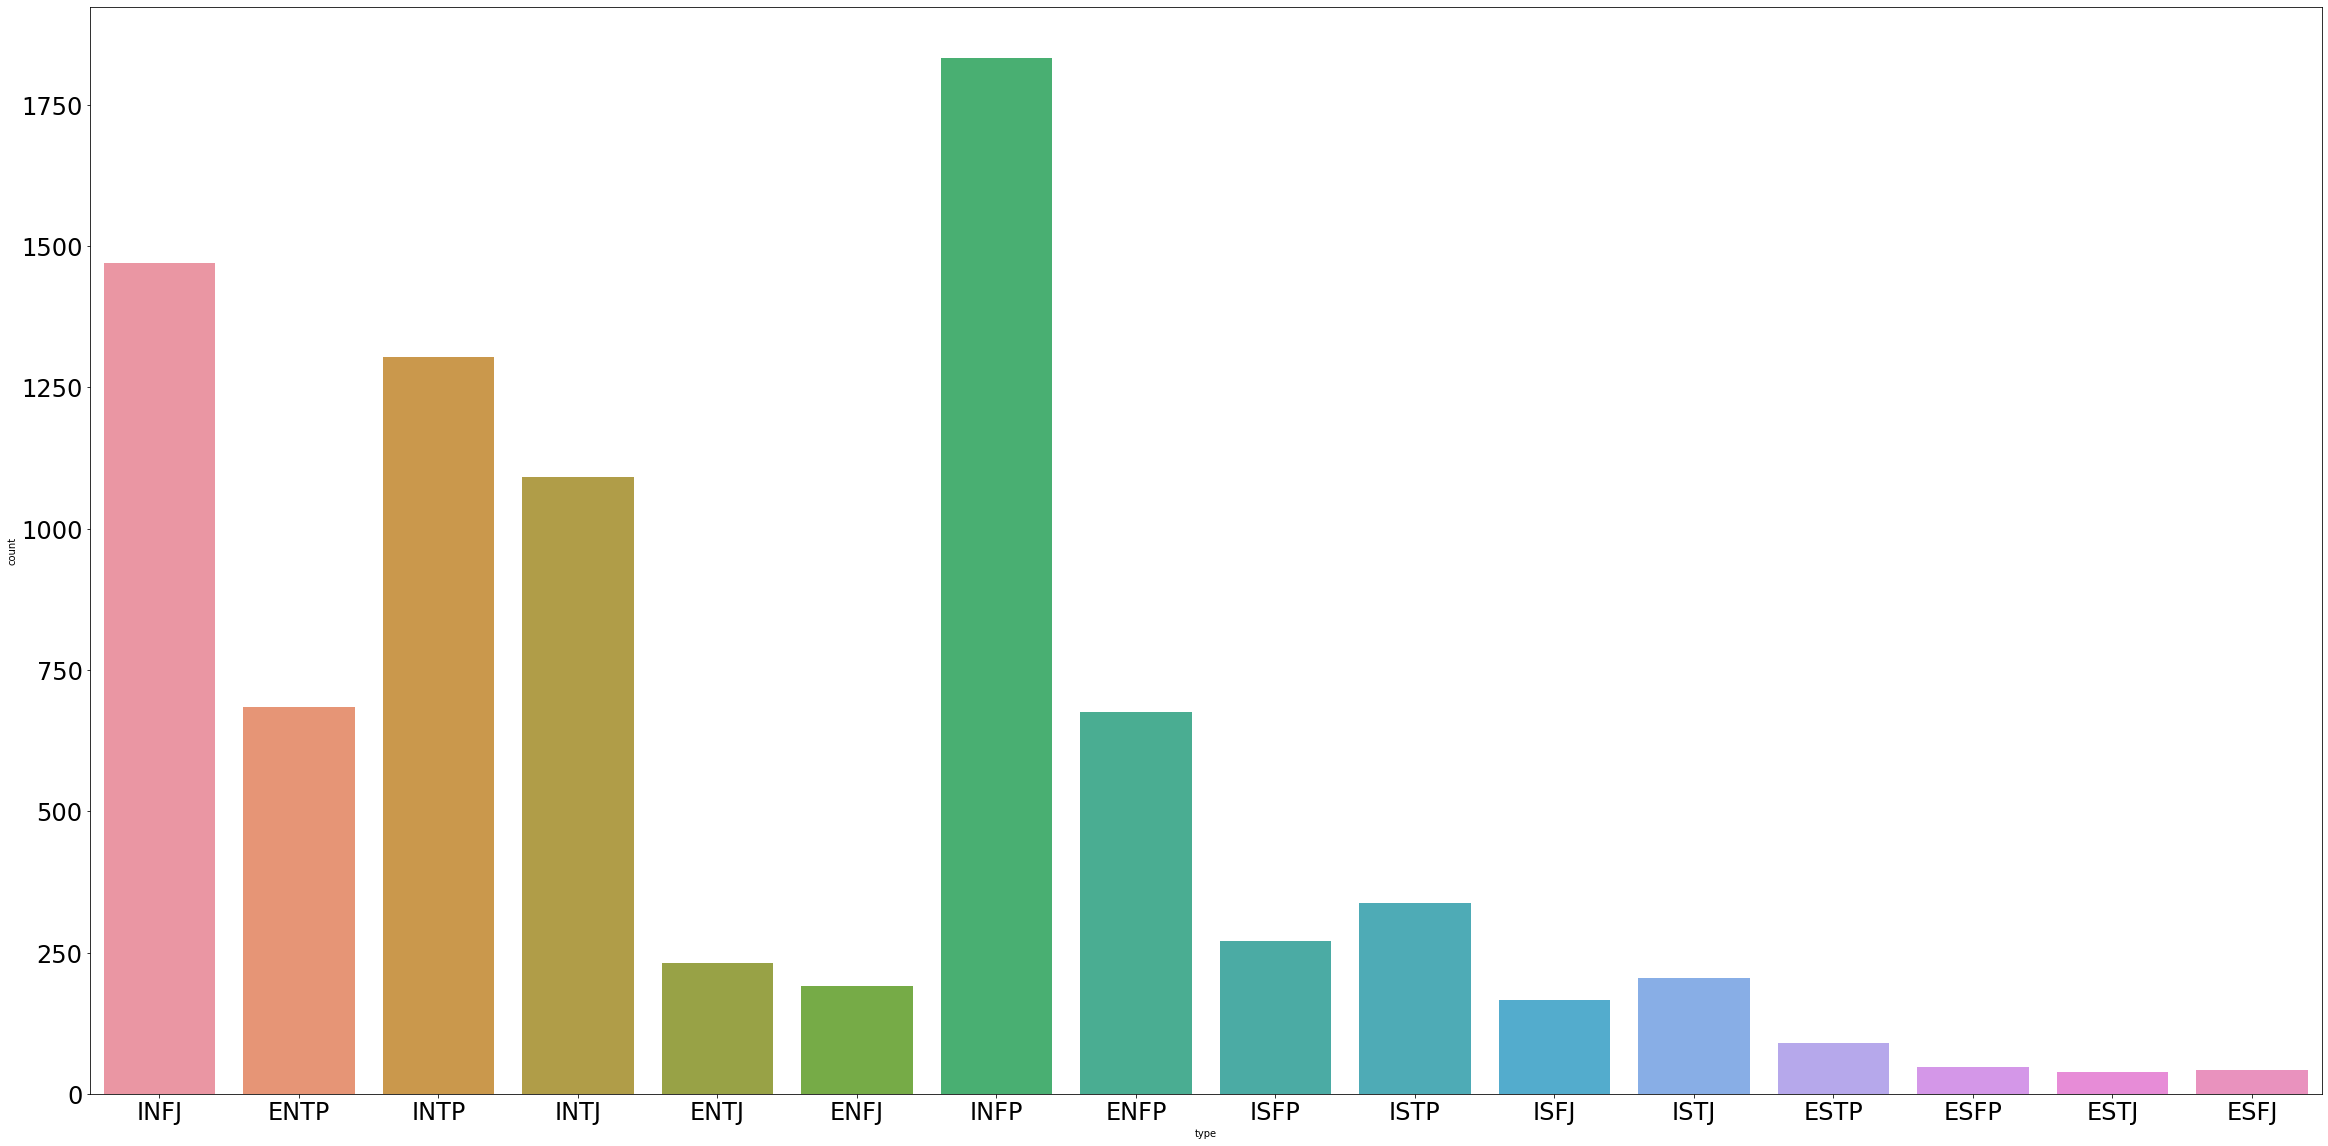

In [95]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=data, x='type')

Preprocessing of text

In [96]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS


stopwords = STOP_WORDS
nlp = spacy.load('en_core_web_sm')


def preprocess(train):

    doc = nlp(train, disable = ['ner', 'parser'])

    lemmas = [token.lemma_ for token in doc]

    a_lemma = [lemma for lemma in lemmas
              if lemma.isalpha() and lemma not in stopwords ]
    return ' ' .join(a_lemma)

#apply preprocessing to posts
data['clean_posts']= data['posts'].apply(preprocess)


In [97]:
data.head()

,type,posts,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,intj moment sportscent play life change experi...
1,ENTP,'I'm finding the lack of me in these posts ver...,find lack post bore position example girlfrien...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good course know blessing absolutely positive ...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear INTP enjoy conversation day Esoteric gabb...
4,ENTJ,'You're fired.|||That's another silly misconce...,silly misconception approach logically key unl...


In [98]:
import nltk
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
tweettoken = TweetTokenizer()
wordnet = WordNetLemmatizer()

data['final_posts'] = data.apply(lambda row: [wordnet.lemmatize(w) for w in tweettoken.tokenize(row['clean_posts'])], axis=1)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [99]:
data['final_posts']=[''.join(post) for post in data['clean_posts']]

In [100]:
data.head()

,type,posts,clean_posts,final_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,intj moment sportscent play life change experi...,intj moment sportscent play life change experi...
1,ENTP,'I'm finding the lack of me in these posts ver...,find lack post bore position example girlfrien...,find lack post bore position example girlfrien...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good course know blessing absolutely positive ...,good course know blessing absolutely positive ...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear INTP enjoy conversation day Esoteric gabb...,dear INTP enjoy conversation day Esoteric gabb...
4,ENTJ,'You're fired.|||That's another silly misconce...,silly misconception approach logically key unl...,silly misconception approach logically key unl...


Data splitting 

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.2)

Vectorization

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=2, ngram_range=(1,2))
X_dtm = vect.fit_transform(X_train['final_posts'].values)




In [103]:
test_X_dtm = vect.transform(X_test['final_posts'].values)
test_X_dtm

<1735x379434 sparse matrix of type '<class 'numpy.float64'>'
	with 910606 stored elements in Compressed Sparse Row format>

Navie Bayes 

In [108]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_dtm, y_train)

y_pred_nb = nb.predict(test_X_dtm)
y_pred_nb1 = nb.predict_proba(test_X_dtm)

from sklearn.metrics import classification_report, log_loss
print('Naive Bayes')
print( classification_report(y_test,y_pred_nb))
print('Log Loss:', log_loss(y_test,y_pred_nb1))

Naive Bayes
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        39
        ENFP       0.00      0.00      0.00       145
        ENTJ       0.00      0.00      0.00        44
        ENTP       0.00      0.00      0.00       122
        ESFJ       0.00      0.00      0.00        14
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        15
        INFJ       0.33      0.00      0.01       309
        INFP       0.21      1.00      0.34       361
        INTJ       0.00      0.00      0.00       222
        INTP       0.00      0.00      0.00       250
        ISFJ       0.00      0.00      0.00        35
        ISFP       0.00      0.00      0.00        52
        ISTJ       0.00      0.00      0.00        32
        ISTP       0.00      0.00      0.00        77

    accuracy                           0.21      1735
   macro avg  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_nb,y_test))

0.2080691642651297


Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier 
randomforest = RandomForestClassifier()
randomforest.fit(X_dtm, y_train)
y_pred_rf = randomforest.predict(test_X_dtm)
y_pred_rf1 = randomforest.predict_proba(test_X_dtm)
print('Random Forest')
print( classification_report(y_test,y_pred_rf))
print('Log Loss:', log_loss(y_test,y_pred_rf1))

Random Forest
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        39
        ENFP       0.86      0.13      0.23       145
        ENTJ       0.00      0.00      0.00        44
        ENTP       0.76      0.13      0.22       122
        ESFJ       0.00      0.00      0.00        14
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        15
        INFJ       0.51      0.53      0.52       309
        INFP       0.36      0.92      0.52       361
        INTJ       0.65      0.44      0.53       222
        INTP       0.50      0.62      0.55       250
        ISFJ       0.00      0.00      0.00        35
        ISFP       0.00      0.00      0.00        52
        ISTJ       0.00      0.00      0.00        32
        ISTP       0.00      0.00      0.00        77

    accuracy                           0.45      1735
   macro avg

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_rf,y_test))

0.4507204610951009


Light GBM

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=8,random_state=42,n_estimators=200) 
model.fit(X_dtm, y_train)


In [120]:
y_pred_lgb = model.predict(test_X_dtm)
y_pred_lgb1 = model.predict_proba(test_X_dtm)
print('Light GBM')
print( classification_report(y_test,y_pred_lgb))
print('Log Loss:', log_loss(y_test,y_pred_lgb1))

Light GBM
              precision    recall  f1-score   support

        ENFJ       0.59      0.26      0.36        39
        ENFP       0.73      0.59      0.65       145
        ENTJ       0.63      0.27      0.38        44
        ENTP       0.60      0.64      0.62       122
        ESFJ       1.00      0.14      0.25        14
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.67      0.13      0.22        15
        INFJ       0.65      0.73      0.69       309
        INFP       0.66      0.81      0.73       361
        INTJ       0.67      0.72      0.69       222
        INTP       0.67      0.75      0.71       250
        ISFJ       0.81      0.60      0.69        35
        ISFP       0.59      0.44      0.51        52
        ISTJ       0.75      0.56      0.64        32
        ISTP       0.79      0.55      0.65        77

    accuracy                           0.67      1735
   macro avg    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_lgb,y_test))

0.6668587896253603


Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_dtm, y_train)

y_pred = logistic.predict(test_X_dtm)
y_pred1 = logistic.predict_proba(test_X_dtm)

from sklearn.metrics import classification_report, log_loss
print('\n\nClass Report:', classification_report(y_test,y_pred))
print('Log Loss:', log_loss(y_test,y_pred1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,




Class Report:               precision    recall  f1-score   support

        ENFJ       0.67      0.05      0.10        39
        ENFP       0.77      0.37      0.50       145
        ENTJ       1.00      0.07      0.13        44
        ENTP       0.69      0.45      0.54       122
        ESFJ       0.00      0.00      0.00        14
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        15
        INFJ       0.63      0.70      0.66       309
        INFP       0.49      0.89      0.63       361
        INTJ       0.68      0.69      0.69       222
        INTP       0.58      0.78      0.66       250
        ISFJ       1.00      0.09      0.16        35
        ISFP       0.60      0.06      0.11        52
        ISTJ       0.75      0.09      0.17        32
        ISTP       0.80      0.10      0.18        77

    accuracy                           0.58      1735
   macro a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.5844380403458214


Tuning of Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
C_list = [0.001,0.01,0.1, 1,2,5,10,50]
logistic = LogisticRegression()    
parameters = {'C':(C_list)}
clf = GridSearchCV(logistic, parameters)
best = clf.fit(X_dtm,y_train)
best.best_params_

In [106]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=10, class_weight='balanced',solver='newton-cg', multi_class='multinomial',penalty='l2')
logistic.fit(X_dtm, y_train)

y_pred = logistic.predict(test_X_dtm)
y_pred1 = logistic.predict_proba(test_X_dtm)

from sklearn.metrics import classification_report, log_loss
print('\n\nClass Report:', classification_report(y_test,y_pred))
print('Log Loss:', log_loss(y_test,y_pred1))



Class Report:               precision    recall  f1-score   support

        ENFJ       0.54      0.36      0.43        39
        ENFP       0.71      0.58      0.64       145
        ENTJ       0.61      0.45      0.52        44
        ENTP       0.58      0.57      0.58       122
        ESFJ       0.56      0.36      0.43        14
        ESFP       0.00      0.00      0.00        10
        ESTJ       1.00      0.12      0.22         8
        ESTP       0.50      0.07      0.12        15
        INFJ       0.71      0.69      0.70       309
        INFP       0.67      0.82      0.74       361
        INTJ       0.67      0.74      0.70       222
        INTP       0.68      0.79      0.73       250
        ISFJ       0.71      0.49      0.58        35
        ISFP       0.61      0.38      0.47        52
        ISTJ       0.80      0.62      0.70        32
        ISTP       0.77      0.65      0.70        77

    accuracy                           0.68      1735
   macro a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.6755043227665706
